In [2]:
import datablocks
from datablocks import DB
import micron, micron.midatasets, micron.mimodels

In [3]:
GPU='0,1,2,3'
VOCAB = 100
EPOCHS = 128

# DATASETS

In [4]:
# DEBUG
DB('micron.midatasets.MiRNA').UNSAFE_clear_records()

In [5]:
# DEBUG
try:
    DB('micron.midatasets.MiRNA').UNSAFE_clear()
except Exception as e:
    print(e)

datablocks.datablock.DB('micron.midatasets.MiRNA', None, use_native_storage=False) of version 0.0.1 has not been built yet


In [6]:
type(DB('micron.midatasets.MiRNA'))

datablocks.datablock.DB

In [7]:
repr(DB('micron.midatasets.MiRNA'))

"datablocks.datablock.DB('micron.midatasets.MiRNA', None, use_native_storage=False)"

In [8]:
from datablocks import signature
signature.tag(DB('micron.midatasets.MiRNA'))

"datablocks.datablock.DB('micron.midatasets.MiRNA')"

In [9]:
try:
    DB('micron.midatasets.MiRNA', verbose=True, datablock=dict(rebuild=True)).extent()
except Exception as e:
    print(e)

datablocks.datablock.DB('micron.midatasets.MiRNA', None, use_native_storage=False, verbose=True, datablock={'rebuild': True}) of version 0.0.1 has not been built yet


In [10]:
DB('micron.midatasets.MiRNA', verbose=True, datablock=dict(rebuild=True)).build()

100%|██████████| 1/1 [00:04<00:00,  4.91s/it]


Parsing local copy /home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/tmpo6713gm75xyd6gfx/train_fraction=0.9/miRNA.dat.gz
Built dataframe
Built train dataset from dataframe with train_fraction 0.9
Built test dataset from dataframe with train_fraction 0.9
Wrote train dataset to /home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/tmpo6713gm75xyd6gfx/train_fraction=0.9/miRNA.train.parquet
Wrote test dataset to /home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/tmpo6713gm75xyd6gfx/train_fraction=0.9/miRNA.test.parquet
task_id: 5473428391403369029


{None: {(('train_fraction',
    0.9),): '/home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/train_fraction=0.9'}}

In [11]:
DB('micron.midatasets.MiRNA', verbose=True, datablock=dict(rebuild=False)).extent()

{None: ({'train_fraction': 0.9},
  '/home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/train_fraction=0.9')}

In [ ]:
DB('micron.midatasets.MiRNA').list()

In [ ]:
DB('micron.midatasets.MiRNA').topics

In [ ]:
DB('micron.midatasets.MiRNA').read()

In [ ]:
print(repr(DB('micron.midatasets.MiRNA').reader()))

In [ ]:
eval(repr(DB('micron.midatasets.MiRNA').reader()))

In [ ]:
#%%debug
reader = DB('micron.midatasets.MiRNA').reader()

In [ ]:
type(reader)

In [ ]:
print(signature.tag(reader))

In [ ]:
print(repr(reader))

# TOKENIZER

In [ ]:
# DEBUG
DB('micron.midatasets.Tokenizer').UNSAFE_clear_records()

In [ ]:
micron.midatasets.Tokenizer.build?

In [ ]:
DB('micron.midatasets.Tokenizer', f'mirna.{VOCAB}').build(datasets=DB('micron.midatasets.MiRNA').reader(), 
                                                          tokenizer_trainer_vocab_size=VOCAB)

In [ ]:
DATABLOCK('micron.midatasets.Tokenizer', f'mirna.{VOCAB}').extent(datasets=DB('micron.midatasets.MiRNA').reader(), tokenizer_trainer_vocab_size=VOCAB)

In [ ]:
DB('micron.midatasets.Tokenizer', f'mirna.{VOCAB}').records()

# TOKENIZED DATASETS

In [ ]:
# DEBUG
DB('micron.midatasets.TokenizedDatasets').UNSAFE_clear_records()

In [ ]:
DB('micron.midatasets.TokenizedDatasets', f'mirna.mirna.{VOCAB}', verbose=True, datablock=dict(verbose=True))\
                  .build(datasets=DB('micron.midatasets.MiRNA').reader(),\
                     tokenizer=DB('micron.midatasets.Tokenizer', f'mirna.{VOCAB}').reader())

In [ ]:
DB('micron.midatasets.TokenizedDatasets', f'mirna.mirna.{VOCAB}').extent()

In [ ]:
DB('micron.midatasets.TokenizedDatasets', f'mirna.mirna.{VOCAB}').extent_metric()

In [ ]:
DB('micron.midatasets.TokenizedDatasets', f'mirna.mirna.{VOCAB}').records()

In [ ]:
print(DB('micron.midatasets.TokenizedDatasets', f'mirna.mirna.{VOCAB}').read())

# MODEL

In [ ]:
DB('micron.mimodels.GPT2', f'mirna.mirna.{VOCAB}.{EPOCHS}', gpu=GPU, datablock=dict(verbose=True))\
.UNSAFE_clear_records()

In [ ]:
try:
    DB('micron.mimodels.GPT2', f'mirna.mirna.{VOCAB}.{EPOCHS}', gpu=GPU, datablock=dict(verbose=True))\
        .UNSAFE_clear()
except Exception as e:
    print(e)

In [ ]:
try:
    DB('micron.mimodels.GPT2', f'mirna.mirna.{VOCAB}.{EPOCHS}', gpu=GPU, datablock=dict(verbose=True))\
        .extent()
except Exception as e:
    print(e)

In [ ]:
DB('micron.mimodels.GPT2', f'mirna.mirna.{VOCAB}.{EPOCHS}', gpu=GPU, datablock=dict(verbose=True))\
    .build(tokenized_datasets=DB('micron.midatasets.TokenizedDatasets', f'mirna.mirna.{VOCAB}').reader(),
           tokenizer=DB('micron.midatasets.Tokenizer', f'mirna.{VOCAB}').reader(),
           num_epochs=EPOCHS)

In [ ]:
DB('micron.mimodels.GPT2', f'mirna.mirna.{VOCAB}.{EPOCHS}', gpu=GPU, datablock=dict(verbose=True))\
    .extent()

In [ ]:
losses = DB('micron.mimodels.GPT2', f'mirna.mirna.{VOCAB}.{EPOCHS}').read('stats')

In [1]:
fig = micron.mimodels.GPT2.plot_losses(*losses).show()

NameError: name 'micron' is not defined

# LATENT SPACE

From `transformers.generation.utils.GenerationMixin.compute_transition_scores()` docstring:


"""

...

Examples:

        ```python
        >>> from transformers import GPT2Tokenizer, AutoModelForCausalLM
        >>> import numpy as np

        >>> tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        >>> model = AutoModelForCausalLM.from_pretrained("gpt2")
        >>> tokenizer.pad_token_id = tokenizer.eos_token_id
        >>> inputs = tokenizer(["Today is"], return_tensors="pt")

        >>> # Example 1: Print the scores for each token generated with Greedy Search
        >>> outputs = model.generate(**inputs, max_new_tokens=5, return_dict_in_generate=True, output_scores=True)
        >>> transition_scores = model.compute_transition_scores(
        ...     outputs.sequences, outputs.scores, normalize_logits=True
        ... )
        >>> input_length = inputs.input_ids.shape[1]
        >>> generated_tokens = outputs.sequences[:, input_length:]
        >>> for tok, score in zip(generated_tokens[0], transition_scores[0]):
        ...     # | token | token string | logits | probability
        ...     print(f"| {tok:5d} | {tokenizer.decode(tok):8s} | {score.numpy():.3f} | {np.exp(score.numpy()):.2%}")
        |   262 |  the     | -1.414 | 24.33%
        |  1110 |  day     | -2.609 | 7.36%
        |   618 |  when    | -2.010 | 13.40%
        |   356 |  we      | -1.859 | 15.58%
        |   460 |  can     | -2.508 | 8.14%

        >>> # Example 2: Reconstruct the sequence scores from Beam Search
        >>> outputs = model.generate(
        ...     **inputs,
        ...     max_new_tokens=5,
        ...     num_beams=4,
        ...     num_return_sequences=4,
        ...     return_dict_in_generate=True,
        ...     output_scores=True,
        ... )
        >>> transition_scores = model.compute_transition_scores(
        ...     outputs.sequences, outputs.scores, outputs.beam_indices, normalize_logits=False
        ... )
        >>> # If you sum the generated tokens' scores and apply the length penalty, you'll get the sequence scores.
        >>> # Tip: set `normalize_logits=True` to recompute the scores from the normalized logits.
        >>> output_length = inputs.input_ids.shape[1] + np.sum(transition_scores.numpy() < 0, axis=1)
        >>> length_penalty = model.generation_config.length_penalty
        >>> reconstructed_scores = transition_scores.sum(axis=1) / (output_length**length_penalty)
        >>> print(np.allclose(outputs.sequences_scores, reconstructed_scores))
        True
        ```
"""

In [38]:
model = DB('micron.mimodels.GPT2', f'mirna.mirna.{VOCAB}.{EPOCHS}').read('model')

loading configuration file config.json from cache at /home/dkarpeyev/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 0,
  "embd_pdrop": 0.1,
  "eos_token_id": 1,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 50,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_vers

In [39]:
model.to('cuda:0')

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(100, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropo

In [40]:
tokenizer = DB('micron.midatasets.Tokenizer', f'mirna.{VOCAB}').read()

In [41]:
tokenizer

PreTrainedTokenizerFast(name_or_path='', vocab_size=100, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'})

In [63]:
import torch
NUM_RETURN_SEQUENCES = 1000
MAX_LENGTH = 30
torch.manual_seed(0);

In [64]:
%%time
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)
set_seed(42)

CPU times: user 0 ns, sys: 683 µs, total: 683 µs
Wall time: 700 µs


In [12]:
%%time
generator("", max_length=MAX_LENGTH, num_return_sequences=5)

NameError: name 'generator' is not defined

In [66]:
%%time
outputs = model.generate(input_ids=None, 
                         attention_mask=None, 
                         return_dict_in_generate=True, 
                         output_scores=True,        # to compute perplexity/cross-entropy later
                         output_attentions=True,    # for viz
                         output_hidden_states=True, # for UMAP
                         max_length=MAX_LENGTH, 
                         num_return_sequences=NUM_RETURN_SEQUENCES)

Generate config GenerationConfig {
  "bos_token_id": 0,
  "do_sample": true,
  "eos_token_id": 1,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


CPU times: user 368 ms, sys: 1.11 s, total: 1.48 s
Wall time: 1.48 s


In [67]:
outputs

SampleDecoderOnlyOutput(sequences=tensor([[ 0, 54, 51,  ..., 75, 37, 42],
        [ 0, 56, 48,  ..., 59, 64, 55],
        [ 0, 40, 81,  ..., 46, 90, 14],
        ...,
        [ 0, 92, 67,  ...,  1,  1,  1],
        [ 0, 47, 55,  ..., 14, 75, 66],
        [ 0, 94,  3,  ..., 32, 71, 61]], device='cuda:0'), scores=(tensor([[ 0.3582,  0.0168,    -inf,  ...,    -inf,    -inf,  0.9951],
        [ 0.8630,    -inf,    -inf,  ...,    -inf,    -inf,  1.3234],
        [ 0.1915, -0.0039,  0.7866,  ...,    -inf,  0.2199,  1.6719],
        ...,
        [ 0.5187,    -inf,  0.2264,  ...,    -inf,    -inf,  0.4119],
        [ 0.0641,    -inf,    -inf,  ...,    -inf,    -inf,  1.4554],
        [ 0.3672,    -inf,    -inf,  ...,    -inf,    -inf,  1.1736]],
       device='cuda:0'), tensor([[  -inf, 0.2452,   -inf,  ...,   -inf,   -inf, 1.7087],
        [  -inf, 0.3640,   -inf,  ...,   -inf,   -inf, 1.2833],
        [  -inf, 0.3946,   -inf,  ...,   -inf, 0.2647, 1.0306],
        ...,
        [  -inf, 0.828

In [68]:
len(outputs.hidden_states) # one per sequence element, except the last one -- the model is not evaluated on it as input

29

In [69]:
len(outputs.hidden_states[0]) # one per layer: 12 GPT2Blocks followd by a LayerNorm for a total of 13

13

In [70]:
outputs.hidden_states[0][-1].shape # last layer is the logits -- the activations of the final LayerNorm following the 12 transformer blocks
# shape: [NUM_RETURN_SEQUENCES, 1, 768]

torch.Size([1000, 1, 768])

In [71]:
# long_latents: concat the activations from the last hidden layer for all sequence elements
# H is the last activation of shape [N, 1, D]
long_latents_list = [h.reshape(h.shape[0], h.shape[-1]) for h in [H[-1] for H in outputs.hidden_states]]
long_latents = torch.cat(long_latents_list, dim=-1)

In [72]:
long_latents.shape

torch.Size([1000, 22272])

In [73]:
# short_latents: take the last hidden layer activation for the last element of each sequence
_ = outputs.hidden_states[-1][-1]
short_latents = _.reshape((_.shape[0], _.shape[-1]))

In [74]:
short_latents.shape

torch.Size([1000, 768])

# UMAP

In [75]:
import umap
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
sns.set(style='white', context='poster', rc={'figure.figsize':(1000,500)})
%matplotlib inline

In [77]:
fit = umap.UMAP()

In [78]:
%%time
lu = fit.fit_transform(long_latents.cpu().detach().numpy()) 

CPU times: user 1min 51s, sys: 1.29 s, total: 1min 52s
Wall time: 9.73 s


In [79]:
lu.shape

(1000, 2)

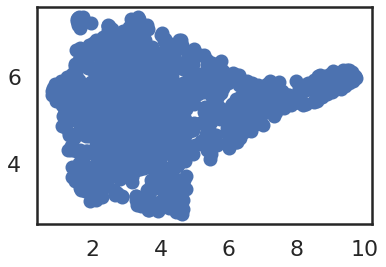

In [80]:
plt.scatter(x=lu[:,0], y=lu[:,1])

In [81]:
%%time
su = fit.fit_transform(short_latents.cpu().detach().numpy()) 

CPU times: user 1min 37s, sys: 1.24 s, total: 1min 39s
Wall time: 5.01 s


In [82]:
su.shape

(1000, 2)

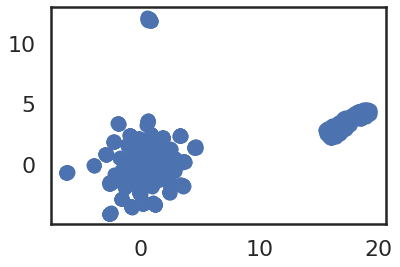

In [83]:
plt.scatter(x=su[:,0], y=su[:,1])